In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("assets/data/fan_audio_dataset.csv", header= None)
dataset.head()

0          1          2          3         4             5
0 -348.44717  108.70171 -14.359937  16.635178 -7.918430  fan_abnormal
1 -379.85380  144.48773   4.612153   7.896369 -3.054631  fan_abnormal
2 -348.60130  109.20175 -12.103954  19.581463 -6.493403  fan_abnormal
3 -384.54517  150.82423   0.334747  18.628782 -6.153275  fan_abnormal
4 -360.97440  128.88104   9.564446  16.023340 -1.010473  fan_abnormal

In [3]:
dataset.columns= ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','class']

In [4]:
dataset['class'].value_counts()

fan_normal      4075
fan_abnormal    1475
Name: class, dtype: int64

In [31]:
data_matrics = dataset.drop(['class'], axis = 1)
data_matrics.head()

mfcc1      mfcc2      mfcc3      mfcc4     mfcc5
0 -348.44717  108.70171 -14.359937  16.635178 -7.918430
1 -379.85380  144.48773   4.612153   7.896369 -3.054631
2 -348.60130  109.20175 -12.103954  19.581463 -6.493403
3 -384.54517  150.82423   0.334747  18.628782 -6.153275
4 -360.97440  128.88104   9.564446  16.023340 -1.010473

### Normalizing Data matrics

In [6]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

### Kmean Clustering

In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')

In [27]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())

In [28]:
cluster_labels.value_counts()

0    3738
1    1042
2     770
Name: cluster, dtype: int64

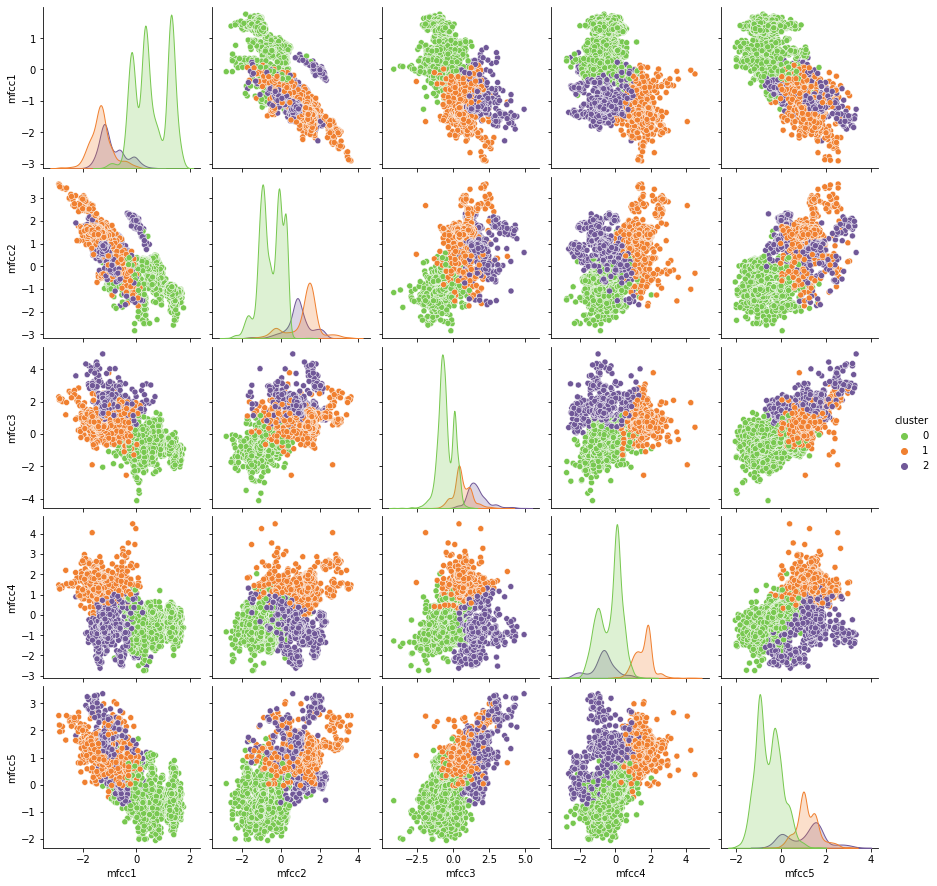

In [29]:
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030','#705898'])

### Spectral Clustering

In [11]:
from sklearn.cluster import SpectralClustering


In [12]:
SpecCluster= SpectralClustering(n_clusters=3, assign_labels='discretize')
SpecCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(SpecCluster.labels_, name='cluster')

In [13]:
cluster_labels.value_counts()

0    3832
2     919
1     799
Name: cluster, dtype: int64

In [14]:
data_matrics_spec = data_matrics_normalized.join(cluster_labels.to_frame())

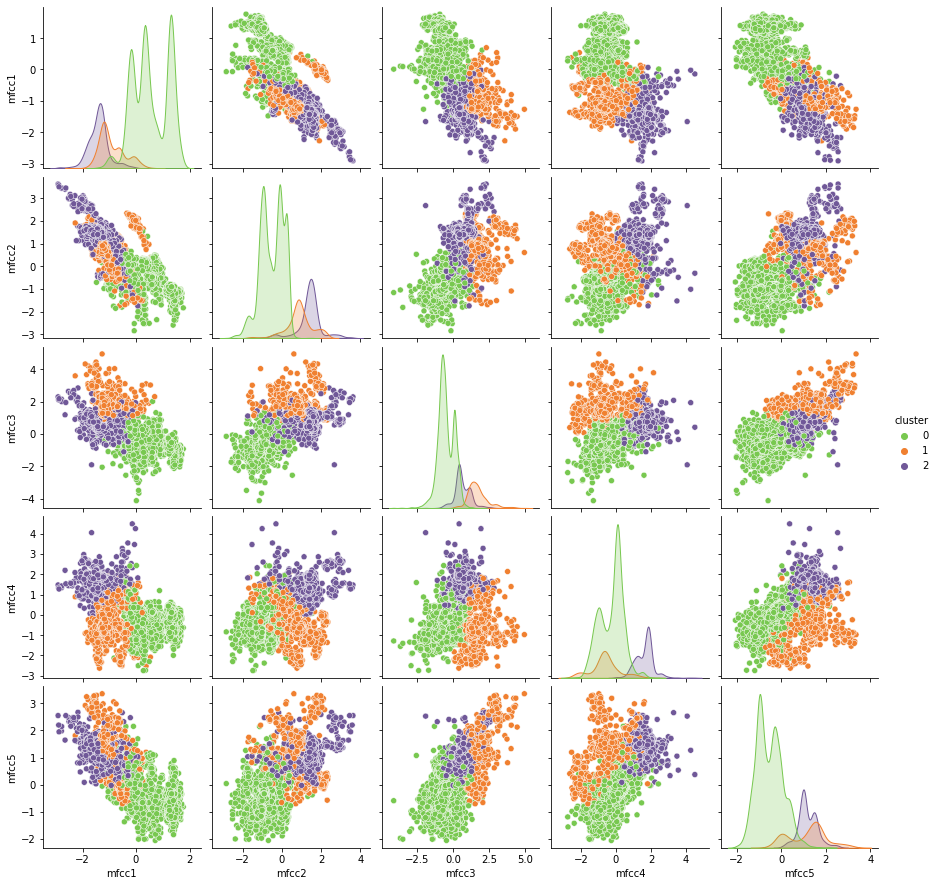

In [15]:
sns.pairplot(data_matrics_spec, hue = 'cluster', palette=['#78C850', '#F08030','#705898'])

### Hierarchical clustering with Agglomerative Clustering Algorithem

In [16]:
from sklearn.cluster import AgglomerativeClustering

AggCluster= AgglomerativeClustering(n_clusters=3)
AggCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
data_metrics_AggCluster = data_matrics_normalized.join(cluster_labels.to_frame())

In [17]:
cluster_labels.value_counts()

0    3850
1     918
2     782
Name: cluster, dtype: int64

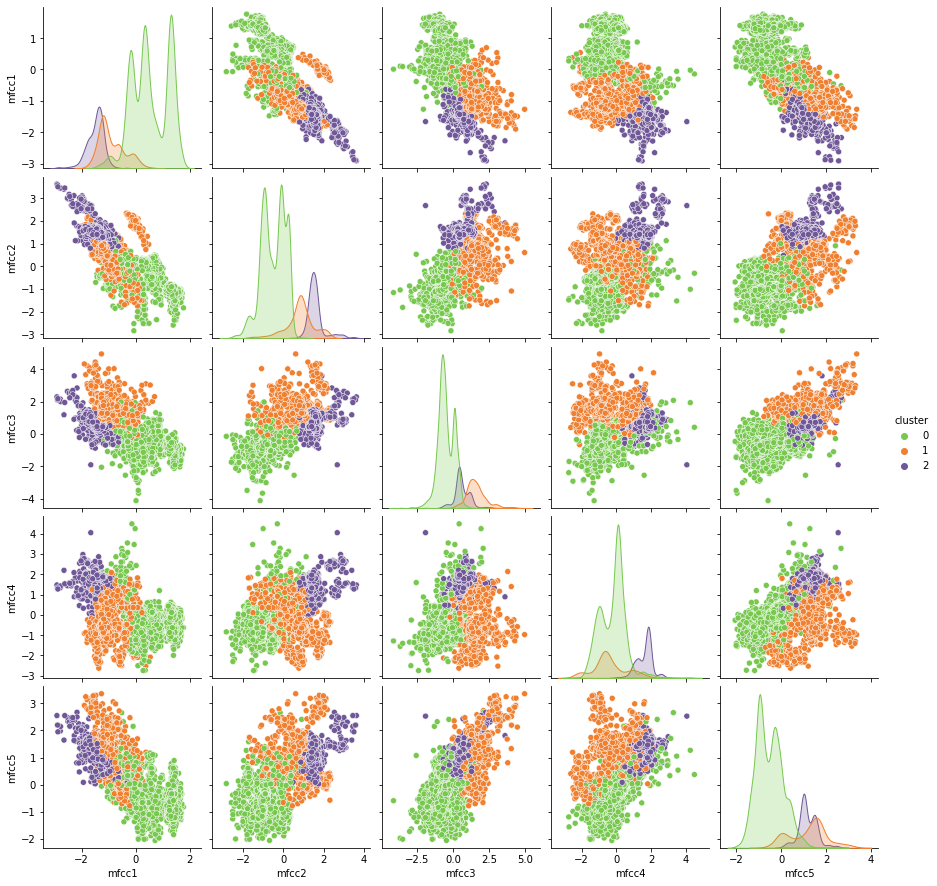

In [18]:
sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030','#705898'])

### Different Clustering Algorithm comparision with plot

<AxesSubplot:title={'center':'Agglomerative Clustering'}, xlabel='mfcc1', ylabel='mfcc5'>

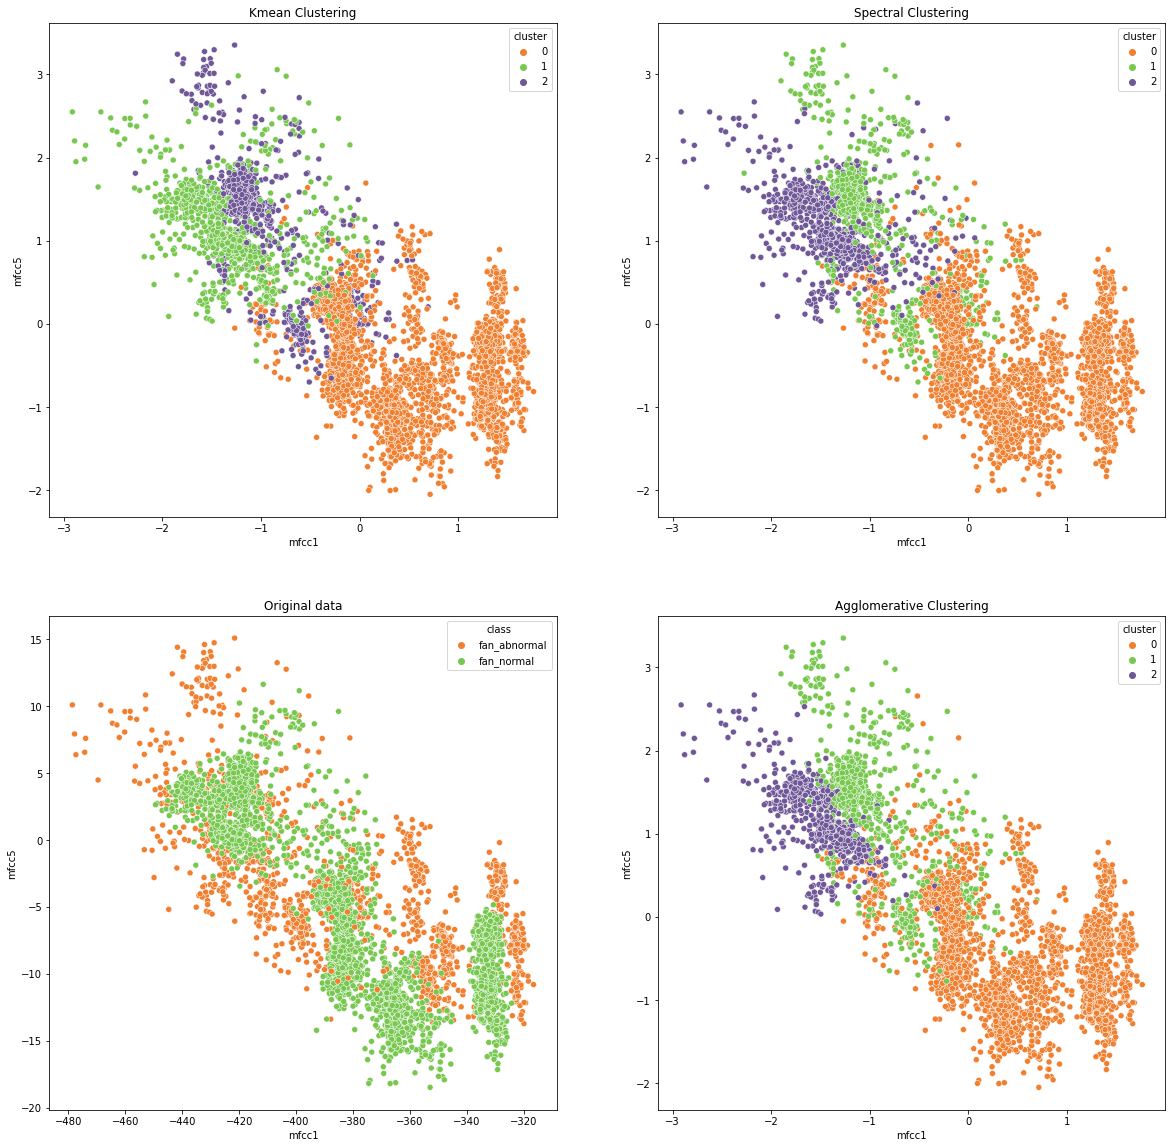

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes[0,0].title.set_text("Kmean Clustering")
axes[0,1].title.set_text("Spectral Clustering")
axes[1,0].title.set_text("Original data")
axes[1,1].title.set_text("Agglomerative Clustering")

sns.scatterplot(ax= axes[0,0], data=data_matrics_kmean, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850','#705898'])
sns.scatterplot(ax= axes[0,1], data=data_matrics_spec, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850','#705898'])
sns.scatterplot(ax= axes[1,0], data=dataset, x="mfcc1", y="mfcc5",hue = 'class', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[1,1], data=data_metrics_AggCluster, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850','#705898'])

### Scatter pairplot for original Data

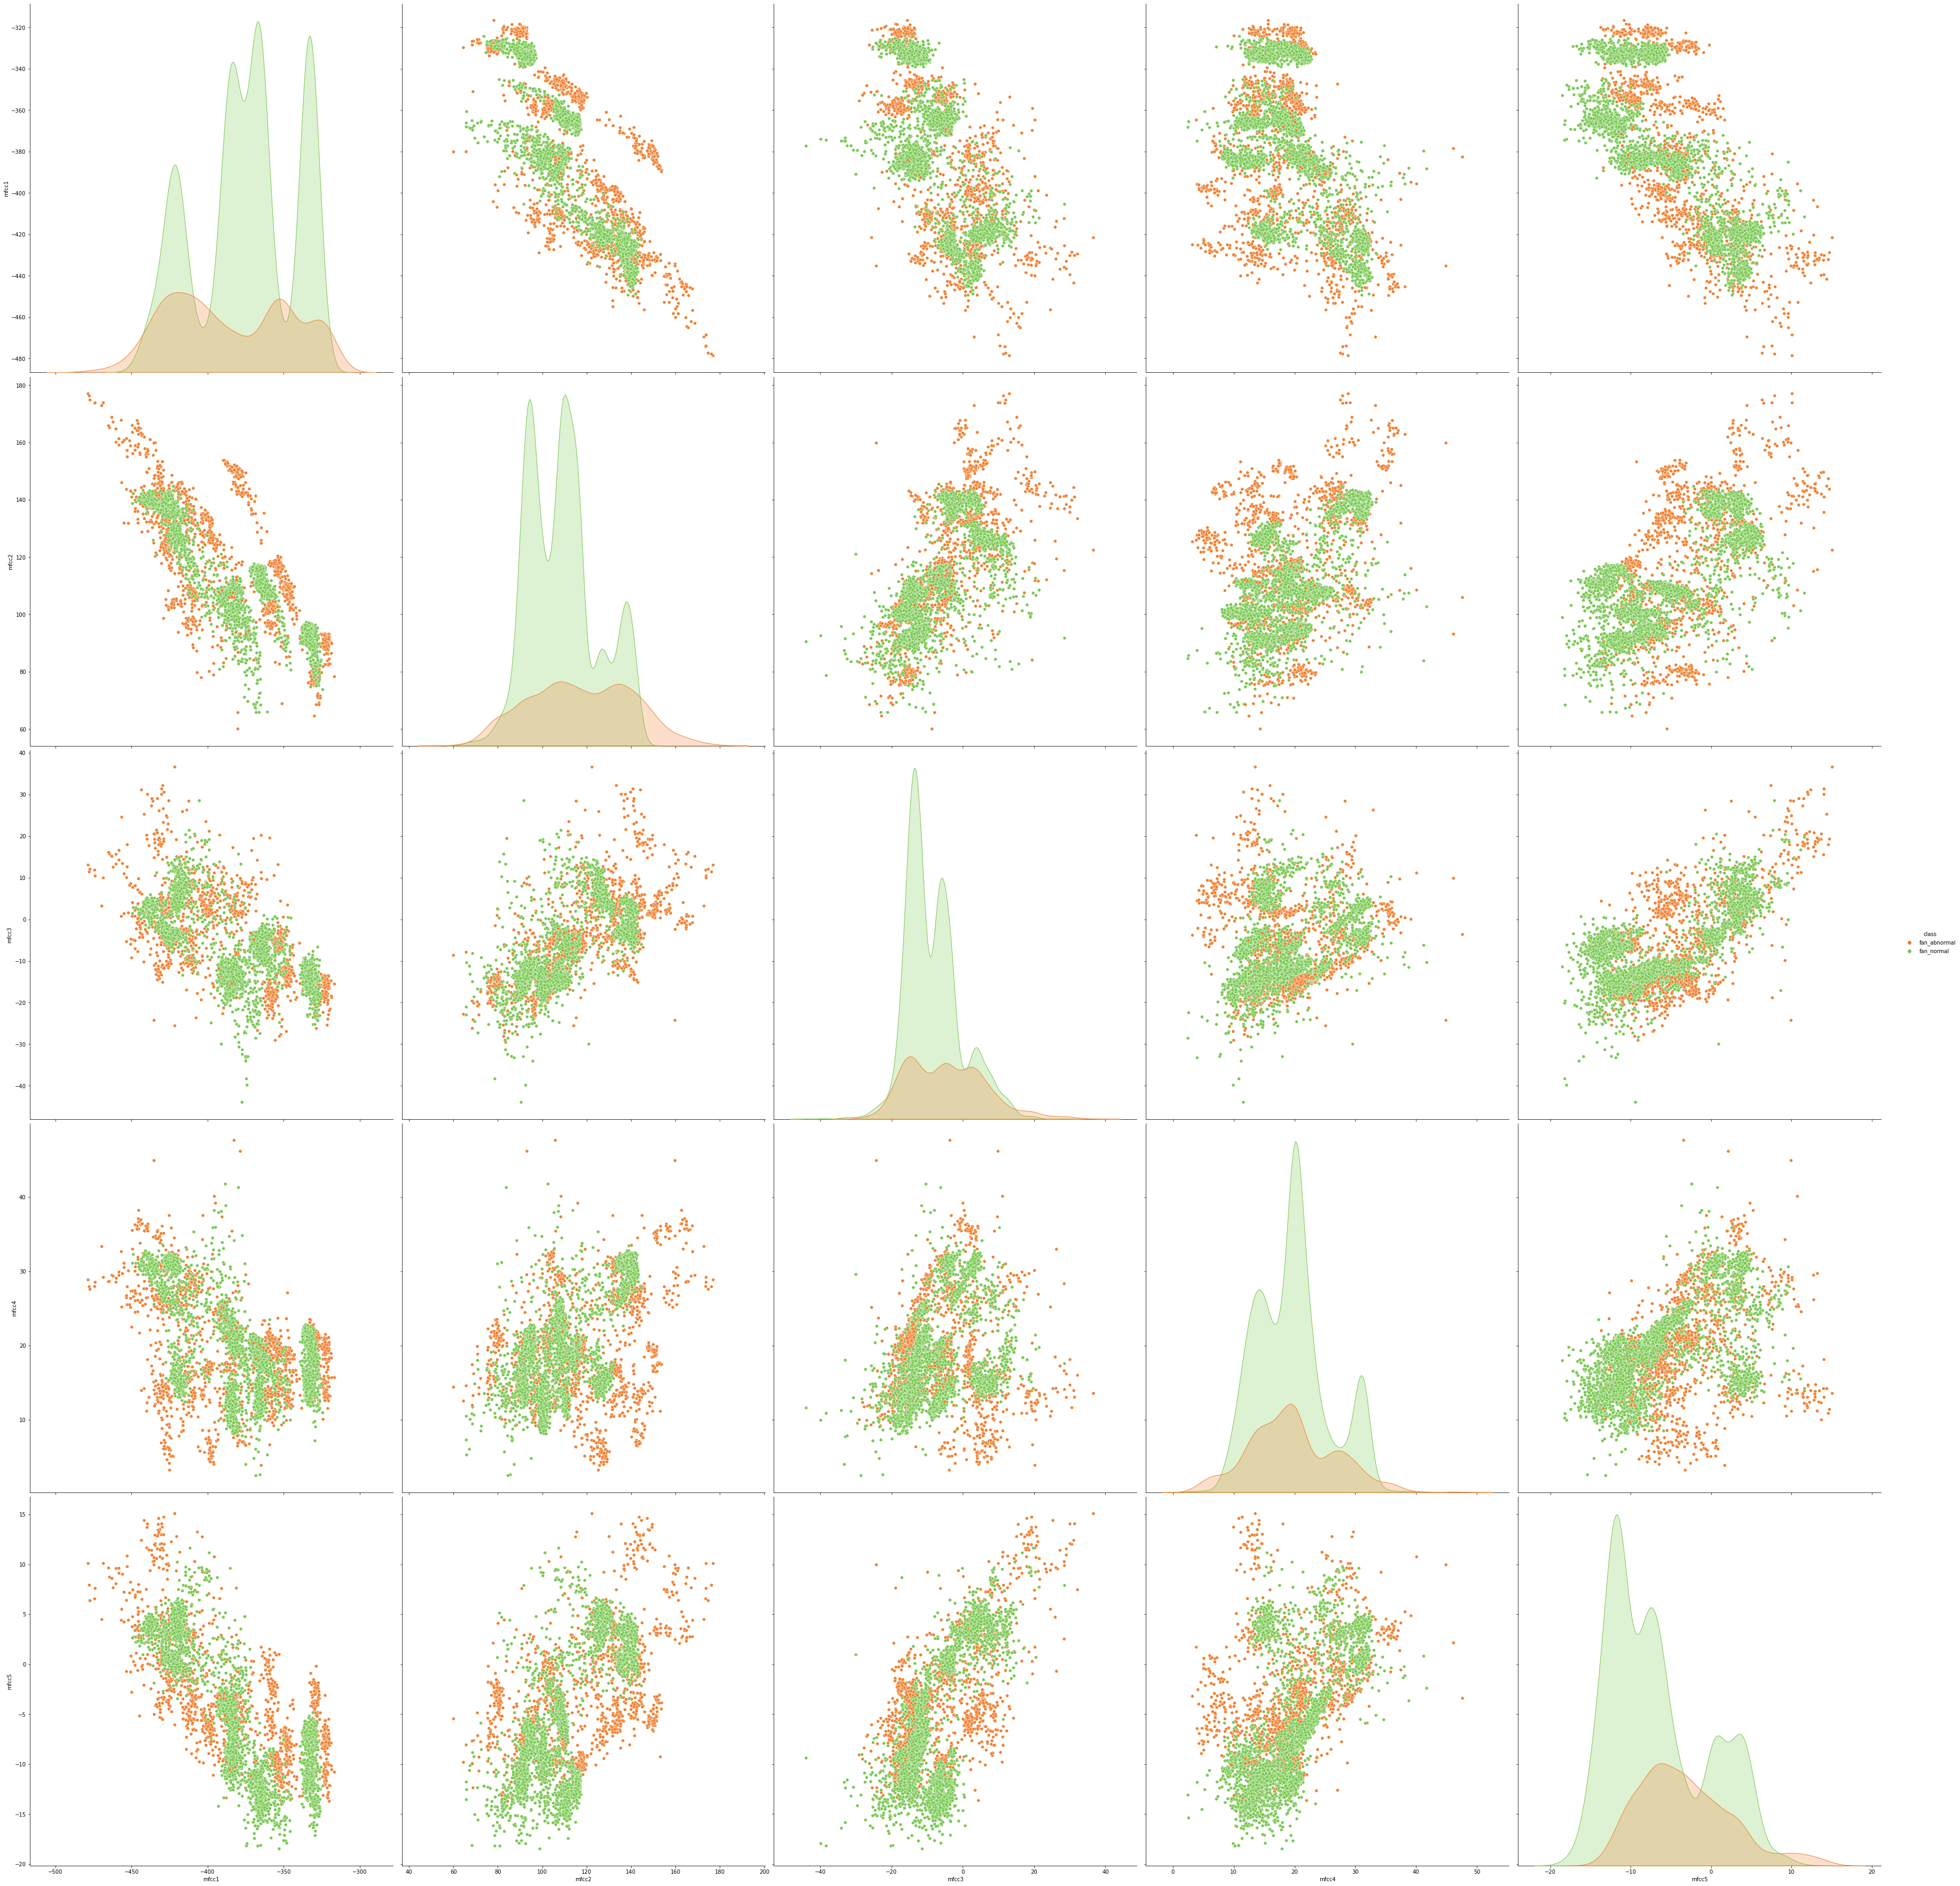

In [24]:
sns.pairplot(dataset, hue = 'class', palette=['#F08030', '#78C850'], height=10)
# sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030','#705898'])